## **Descripcion del problema**

 El ejecutivo de servicio al cliente está evaluando el servicio prestado en una de sus líneas de atención, su objetivo consiste en rediseñar el esquema de atención actual hacia uno más personalizado y enfocado en las necesidades específicas de sus clientes. Para este fin, cuenta con el historial de consultas realizadas en la línea de atención y con algunas características de sus clientes.

Como científicos de datos planteamos el siguiente esquema de trabajo que se deberá llevar a cabo para mejorar la atención en el canal.

- a. Conocer el tipo de cliente que se comunica a la línea. Realizar un análisis descriptivo detallado de las variables, realizar análisis de correlación y pruebas de hipótesis.

- b. Utilizare al menos 3 modelos supervisados, que prediga la variable ‘y’ que se encuentra en la base de datos.




In [1]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Seteo del display para ver todas las columnas que contiene cada dataframe
pd.set_option('display.max_columns',None)

In [3]:
# importamos los datos de New_HistConsultas.csv
df_New_HistConsultas = pd.read_csv('New_HistConsultas.csv', encoding = 'latin-1', sep = ';')
df_New_HistConsultas.head(5)

,Unnamed: 0,ID_Cuenta,Fecha_consulta,Tipo_consulta
0,0,340,2015-06-22 16:14:35,Actualización datos
1,1,340,2015-06-22 16:37:02,Agendamiento citas
2,2,340,2015-06-22 15:50:56,Agendamiento citas
3,3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas
4,4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas


In [4]:
# importamos los datos de New_Usuarios.csv
df_New_Usuarios = pd.read_csv('New_Usuarios.csv', encoding = 'latin-1' , sep = ';')
df_New_Usuarios.head(5)

,ID_Cuenta,Tipo_persona,Departamento,Tiene_plan_avanzado,Tipo_Plan,Es_moroso,Tiene_plus,Ha_caido_mora,Correo,usa_app,Forma_pago,Monto_adeudado,Edad,Estrato,Motivo_llamada,Duracion_llamada,Tiempo_en_espera,Transferencia_llamada,primera_llamada,Antiguedad,Recomienda_marca,y
0,340,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
1,4d5c0e16-9bef-8334-687e-55f043e02c62,soltero,Santafé de Bogotá,no,f,no,si,si,si,no,mensajero,30167.091798,65,3,m17,124.262540,55.257504,no,no,new-new,si,0
2,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,soltero,Santafé de Bogotá,no,f,no,si,no,no,si,tienda,11842.044402,30,2,m10,178.120444,4.635882,no,no,mid-age,si,0
3,1640de7c-ba08-cdfc-c21b-517fd7c5a259,soltero,Santafé de Bogotá,no,f,si,si,no,no,si,online,39601.288181,32,4,m18,332.970456,30.698536,no,no,Legend,no,0
4,e820f090-f4e7-eb8b-677c-55808c868b6f,unión libre,Santafé de Bogotá,no,b,no,si,si,si,si,online,36126.943210,70,3,m2,70.864127,44.999640,si,si,Legend,no,0


## **1). Analisis EDA**

In [5]:
df_New_HistConsultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282960 entries, 0 to 1282959
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Unnamed: 0      1282960 non-null  int64 
 1   ID_Cuenta       1282960 non-null  object
 2   Fecha_consulta  1282960 non-null  object
 3   Tipo_consulta   1282960 non-null  object
dtypes: int64(1), object(3)
memory usage: 39.2+ MB


In [6]:
# Verificamos datos faltantes de df_New_HistConsultas
df_New_HistConsultas.isnull().sum()

,0
Unnamed: 0,0
ID_Cuenta,0
Fecha_consulta,0
Tipo_consulta,0


In [10]:
df_New_Usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337051 entries, 0 to 337050
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cuenta              337051 non-null  object 
 1   Tipo_persona           330318 non-null  object 
 2   Departamento           337051 non-null  object 
 3   Tiene_plan_avanzado    337051 non-null  object 
 4   Tipo_Plan              303409 non-null  object 
 5   Es_moroso              337051 non-null  object 
 6   Tiene_plus             337051 non-null  object 
 7   Ha_caido_mora          337051 non-null  object 
 8   Correo                 337051 non-null  object 
 9   usa_app                337051 non-null  object 
 10  Forma_pago             252924 non-null  object 
 11  Monto_adeudado         337051 non-null  float64
 12  Edad                   337051 non-null  int64  
 13  Estrato                303462 non-null  object 
 14  Motivo_llamada         336770 non-nu

In [11]:
# Verificamos datos faltantes de df_New_Usuarios
total_Usuarios = df_New_Usuarios.isnull().sum().sort_values(ascending=False)
porcentaje =  (df_New_Usuarios.isnull().sum() / df_New_Usuarios.isnull().count()).sort_values(ascending=False)
df__Null_Usuarios = pd.concat([total_Usuarios,porcentaje], axis = 1 , keys = ['Total' , 'Porcentajes'])
df__Null_Usuarios.head(7)


,Total,Porcentajes
Forma_pago,84127,0.249597
Tipo_Plan,33642,0.099813
Estrato,33589,0.099656
Tipo_persona,6733,0.019976
Motivo_llamada,281,0.000834
ID_Cuenta,0,0.000000
Es_moroso,0,0.000000


In [12]:
#Ver los datos duplicados de la columna ID para el df_New_Usuarios en los datos de los usuarios
df_New_Usuarios[df_New_Usuarios.duplicated(['ID_Cuenta'])]

,ID_Cuenta,Tipo_persona,Departamento,Tiene_plan_avanzado,Tipo_Plan,Es_moroso,Tiene_plus,Ha_caido_mora,Correo,usa_app,Forma_pago,Monto_adeudado,Edad,Estrato,Motivo_llamada,Duracion_llamada,Tiempo_en_espera,Transferencia_llamada,primera_llamada,Antiguedad,Recomienda_marca,y
8,1,casado,Boyacá,no,d,no,si,si,no,no,online,14410.181689,45,4,m17,168.056028,2.801818,si,no,Legend,si,0
9,1,casado,Cauca,no,b,no,si,si,si,si,online,9877.311198,78,5,m32,53.254917,26.057464,no,si,new-new,si,1
10,1,casado,Santafé de Bogotá,no,f,no,si,no,no,si,online,10653.923985,19,5,m11,194.760263,11.764282,no,no,Young,si,0
11,1,soltero-casado.,Antioquia,no,e,no,si,no,si,si,online,15594.096321,45,4,m32,396.918333,20.904321,no,no,Young,talvez,1
12,1,casado,Valle del Cauca,no,e,no,si,no,no,si,NaN,7759.609790,52,1,m10,117.241591,5.882674,si,no,Legend,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336848,9993828,soltero,Caldas,no,c,no,si,no,si,si,online,18915.251114,31,5,m21,264.900062,6.862730,no,no,new-new,no,0
336925,CX15943450U,soltero,Atlántico,si,a,no,si,no,no,si,tienda,26783.406875,48,4,m23,251.802790,36.872544,no,no,new-new,talvez,0
336972,HAKA560727SDA,NaN,Santafé de Bogotá,no,d,no,si,no,si,no,NaN,11766.733452,63,NaN,m14,378.302931,13.928174,si,no,Legend,si,0
336974,HBO100507I78,soltero,Santafé de Bogotá,no,f,no,si,no,si,si,mensajero,19309.305286,77,5,m3,205.969843,24.145560,no,no,new-new,no,0


In [13]:
#Ver los datos duplicados de la columna ID para el df_New_HistConsultas en los datos de los usuarios
df_New_HistConsultas[df_New_HistConsultas.duplicated(['ID_Cuenta'])]

,Unnamed: 0,ID_Cuenta,Fecha_consulta,Tipo_consulta
1,1,340,2015-06-22 16:37:02,Agendamiento citas
2,2,340,2015-06-22 15:50:56,Agendamiento citas
5,5,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 21:15:50,Agendamiento citas
7,7,1640de7c-ba08-cdfc-c21b-517fd7c5a259,2015-07-27 23:06:23,Procesos web
8,8,1640de7c-ba08-cdfc-c21b-517fd7c5a259,2015-09-01 15:04:01,Actualización datos
...,...,...,...,...
1282955,1282955,YA5972336,2015-08-10 15:37:38,Agendamiento citas
1282956,1282956,YA5981643,2015-08-25 16:21:23,Actualización datos
1282957,1282957,YB429084,2015-08-25 16:11:57,Agendamiento citas
1282958,1282958,YO231519S,2015-08-19 11:57:21,Información general


In [14]:
# Contar duplicados en ID_Cuenta
duplicados = df_New_Usuarios[df_New_Usuarios['ID_Cuenta'].duplicated(keep=False)]
print("Total de registros duplicados:", len(duplicados))
print("Valores únicos de ID_Cuenta duplicados:", duplicados['ID_Cuenta'].unique())

Total de registros duplicados: 34067
Valores únicos de ID_Cuenta duplicados: ['1' '2' '22' ... 'HAKA560727SDA' 'HBO100507I78' 'N6029769']


**Eliminamos los datos duplicados de ID_Cuenta del df New_Usuarios ya que cada usuario dene tener un ID unico.**

In [15]:
df_New_Usuarios_sin_duplicados = df_New_Usuarios.drop_duplicates(subset = 'ID_Cuenta' , keep = 'first')

print('Dimensiones del data set original:', df_New_Usuarios.shape)
print('Dimensiones del data set sin duplicados:', df_New_Usuarios_sin_duplicados.shape)


Dimensiones del data set original: (337051, 22)
Dimensiones del data set sin duplicados: (319862, 22)


In [16]:
# Funcion para comvertir los tipos de datos al dato requerido
def convertir_tipo_dato(df, columna, tipo):

    if columna not in df.columns:
            raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    tipos_soportados = ['int', 'float', 'object', 'datetime']
    if tipo not in tipos_soportados:
        raise ValueError(f"Tipo '{tipo}' no soportado. Use uno de estos: {tipos_soportados}")

    try:
        if tipo == 'datetime':
            df[columna] = pd.to_datetime(df[columna], errors='coerce')
        elif tipo == 'int':
            df[columna] = pd.to_numeric(df[columna], errors='coerce').astype('Int64')
        elif tipo == 'float':
            df[columna] = pd.to_numeric(df[columna], errors='coerce').astype('float64')
        elif tipo == 'object':
            df[columna] = df[columna].astype(str)
        return df
    except Exception as e:
        raise ValueError(f"Error al convertir la columna '{columna}' a tipo '{tipo}': {str(e)}")


In [17]:
df_New_Usuarios_sin_duplicados  = convertir_tipo_dato(df_New_Usuarios_sin_duplicados,'ID_Cuenta','object')
df_New_HistConsultas  = convertir_tipo_dato(df_New_HistConsultas,'ID_Cuenta','object')

<ipython-input-16-c3b3afafe4b4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].astype(str)


In [18]:
# Realizar la unión interna de los df por medio de la columna ID_Cuenta
datos_completos = pd.merge(df_New_HistConsultas, df_New_Usuarios_sin_duplicados, on='ID_Cuenta', how='inner')
datos_completos = datos_completos.drop(columns = ['Unnamed: 0'])
datos_completos

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento,Tiene_plan_avanzado,Tipo_Plan,Es_moroso,Tiene_plus,Ha_caido_mora,Correo,usa_app,Forma_pago,Monto_adeudado,Edad,Estrato,Motivo_llamada,Duracion_llamada,Tiempo_en_espera,Transferencia_llamada,primera_llamada,Antiguedad,Recomienda_marca,y
0,340,2015-06-22 16:14:35,Actualización datos,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
1,340,2015-06-22 16:37:02,Agendamiento citas,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
2,340,2015-06-22 15:50:56,Agendamiento citas,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas,soltero,Santafé de Bogotá,no,f,no,si,si,si,no,mensajero,30167.091798,65,3,m17,124.262540,55.257504,no,no,new-new,si,0
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas,soltero,Santafé de Bogotá,no,f,no,si,no,no,si,tienda,11842.044402,30,2,m10,178.120444,4.635882,no,no,mid-age,si,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282955,YA5972336,2015-08-10 15:37:38,Agendamiento citas,soltero,Santafé de Bogotá,si,d,no,si,no,no,si,tienda,64218.958057,58,NaN,m13,171.428976,27.545487,si,no,Legend,si,0
1282956,YA5981643,2015-08-25 16:21:23,Actualización datos,soltero,Santafé de Bogotá,no,a,si,si,si,si,no,online,23758.287388,54,6,m13,175.216697,4.645876,no,no,mid-age,talvez,1
1282957,YB429084,2015-08-25 16:11:57,Agendamiento citas,NaN,Santafé de Bogotá,no,NaN,si,si,si,si,si,NaN,12259.011923,38,4,m11,429.847312,21.924225,no,no,Young,si,1
1282958,YO231519S,2015-08-19 11:57:21,Información general,soltero,Exterior,no,a,no,si,si,si,si,online,7335.318314,77,3,azzx456!,116.514234,13.732461,no,no,mid-age,no,0


In [20]:
# Verificamos la estructura y el tipo de datos del nuevo df
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282960 entries, 0 to 1282959
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID_Cuenta              1282960 non-null  object 
 1   Fecha_consulta         1282960 non-null  object 
 2   Tipo_consulta          1282960 non-null  object 
 3   Tipo_persona           1257254 non-null  object 
 4   Departamento           1282960 non-null  object 
 5   Tiene_plan_avanzado    1282960 non-null  object 
 6   Tipo_Plan              1155244 non-null  object 
 7   Es_moroso              1282960 non-null  object 
 8   Tiene_plus             1282960 non-null  object 
 9   Ha_caido_mora          1282960 non-null  object 
 10  Correo                 1282960 non-null  object 
 11  usa_app                1282960 non-null  object 
 12  Forma_pago             961894 non-null   object 
 13  Monto_adeudado         1282960 non-null  float64
 14  Edad              

In [21]:
#Se genera una lista con los datos categoricos y otra con los datos numericos
list_num = datos_completos.select_dtypes(include = ['float64','int64']).columns.to_list()
list_cat = datos_completos.select_dtypes(include = ['object']).columns.to_list()

In [22]:
list_num

['Monto_adeudado', 'Edad', 'Duracion_llamada', 'Tiempo_en_espera', 'y']

In [23]:
list_cat

['ID_Cuenta',
 'Fecha_consulta',
 'Tipo_consulta',
 'Tipo_persona',
 'Departamento',
 'Tiene_plan_avanzado',
 'Tipo_Plan',
 'Es_moroso',
 'Tiene_plus',
 'Ha_caido_mora',
 'Correo',
 'usa_app',
 'Forma_pago',
 'Estrato',
 'Motivo_llamada',
 'Transferencia_llamada',
 'primera_llamada',
 'Antiguedad',
 'Recomienda_marca']

## **Numeral a).**

### **1.1). Analisis descriptivo y visualizacion de datos**

###  Variables numericas

In [24]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de variables numéricas:")
print(datos_completos.drop(columns=['y']).describe())

Estadísticas descriptivas de variables numéricas:
       Monto_adeudado          Edad  Duracion_llamada  Tiempo_en_espera
count    1.282960e+06  1.282960e+06      1.282960e+06      1.282960e+06
mean     1.989604e+04  4.847088e+01      1.990595e+02      2.391370e+01
std      1.411586e+04  1.787934e+01      1.410765e+02      1.693577e+01
min      3.015708e+01  1.800000e+01      1.602929e-01      2.663275e-02
25%      9.528994e+03  3.300000e+01      9.545811e+01      1.142423e+01
50%      1.664272e+04  4.800000e+01      1.665627e+02      2.009315e+01
75%      2.682055e+04  6.400000e+01      2.688650e+02      3.225924e+01
max      1.709877e+05  7.900000e+01      1.463228e+03      1.865452e+02


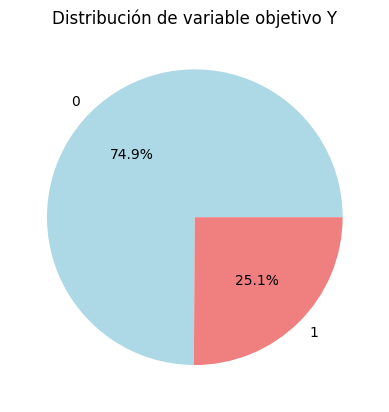

In [25]:
datos_completos['y'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("Distribución de variable objetivo Y")
plt.ylabel("")
plt.show()

### conclusión:

- Podemos ver que la variable objetivo esta desvalanceada y que el 74.9% de los casos reales van etiquetados con un 0 y el 25.1% van etiquetados como 1

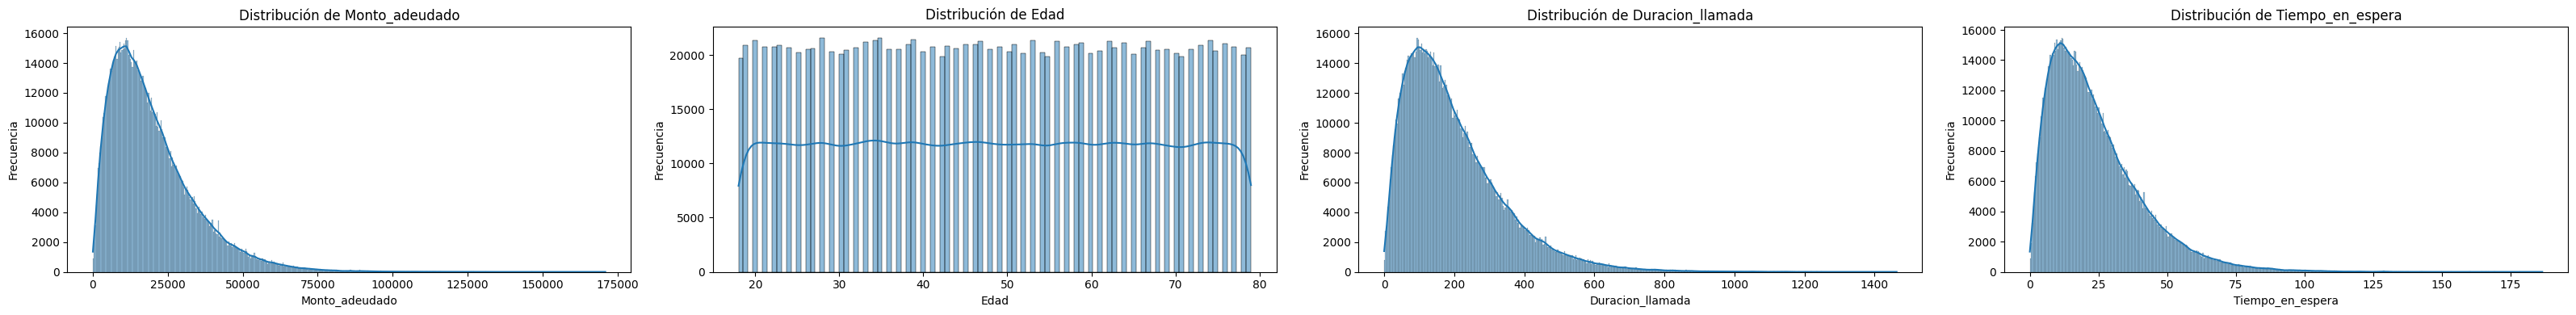

In [26]:
# Funcion para graficar la distribucion de los datos
def hist_numeric(lista,df):

  lista_copia = lista.copy()
  lista_copia.remove('y')
  # Histogramas para variables numéricas
  # Crear figura con subplots en una fila
  fig, axes = plt.subplots(1, len(lista_copia), figsize=(8 * len(lista_copia), 4))

  # Generar histogramas
  for ax, var in zip(axes, lista_copia):
      sns.histplot(df[var], kde=True, ax=ax)
      ax.set(title=f'Distribución de {var}', xlabel=var, ylabel='Frecuencia')

  # Ajustar diseño y mostrar
  plt.tight_layout()
  plt.show()
  #print(df[list_num].apply(skew))



# darle clic sobre los graficos para verlos mas grandes
hist_numeric(list_num,datos_completos)

### **Analisis de distribucion**

In [ ]:
from IPython.display import Image

In [ ]:
Image(url = "https://belenstgo.bigpress.net/images/showid/2755112")

In [ ]:
Image(url = "https://www.mertxejbadiola.com/wp-content/uploads/2023/06/estadistica-tipos-de-asimetria-768x233-1.webp")

### conclusiones:

- La asimetría en la mayoria de las variables numericas es positiva (o sesgo positivo) significa que la distribución de los datos tiene una cola larga hacia la derecha (valores más altos), mientras que la mayoría de los datos se concentran en valores más bajos, lo qu enos uede indicar la precensia de valores atipicos.

- La media es mayor que la mediana, porque los valores extremos en la cola derecha "jalan" la media hacia arriba.

- El coeficiente de asimetría (skewness) es positivo (mayor que 0).

-  El monto adeudado nos dice que gran mayoria de usuarios tiene deudas pequeñas la duracion de llamadas y el tiempo en espera tambien son pequeños

- En cuanto a la Edad lod clientes están distribuidas equitativamente entre 18 y 79 años.No hay un grupo de edad dominante,por ejemplo, no hay una concentración en jóvenes de 20-30 años. Los clientes son diversos en edad, lo que sugiere que los servicios o productos deben atender a un rango amplio de grupos demográficos.

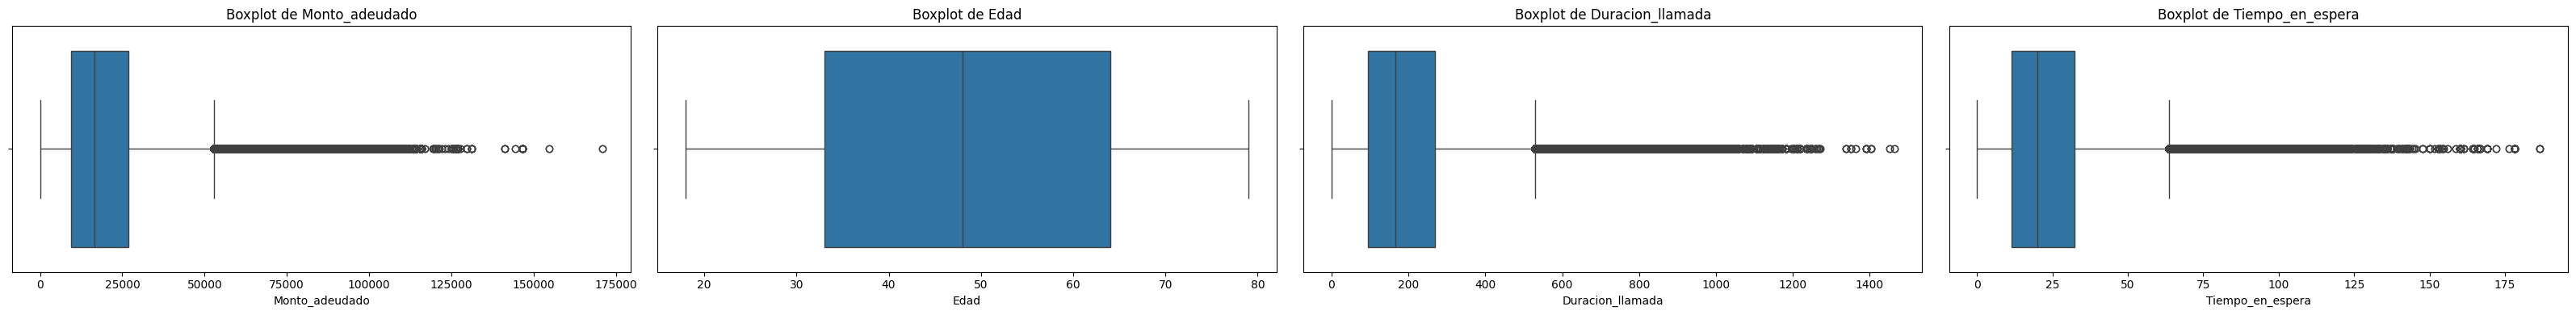

In [27]:
# Funcion para geberar los Boxplot de las columnas numericas, no sirve para evualr que que cuartil se encuantra la mayoria de la poblacion y a identificar valores atipicos
def boxplots_num(lista,df):

  lista_copia = lista.copy()
  # Remover 'y' de list_num
  lista_copia.remove('y')

  # Crear una figura con subplots en una fila
  fig, axes = plt.subplots(1, len(lista_copia), figsize=(8 * len(lista_copia), 4))

  # Generar boxplots
  for i, var in enumerate(lista_copia):
      sns.boxplot(x=df[var], ax=axes[i])
      axes[i].set_title(f'Boxplot de {var}')

  # Ajustar diseño y mostrar
  plt.tight_layout()
  plt.show()

# darle clic sobre los graficos para verlos mas grandes
boxplots_num(list_num,datos_completos)

### **conclusiones:**

- Podemos ver que en Monto_adeudado , Duracion_llamada , Tiempo_en_espera hay una cantidad considerable de datos atipicos que tendran que ser analizados y determinar su importancia dentro del analisis.

- Vemos que edad esta repartido de manera uniforme, como lo habiamos analizado anteriormente.

### Variables categoricas

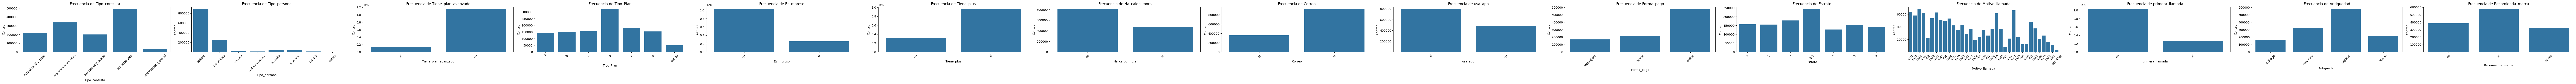

In [28]:
# Funcion para graficar las variables categoricas
def hist_categorical(lista,df):

  lista_copia = lista.copy()
  # Remover variables no deseadas de list_cat
  for var in ['ID_Cuenta', 'Fecha_consulta', 'Transferencia_llamada','Departamento']:
      if var in lista_copia:
          lista_copia.remove(var)

  # Crear una figura con subplots en una fila
  fig, axes = plt.subplots(1, len(lista_copia), figsize=(8 * len(lista_copia), 4))

  # Generar gráficos de barras
  for i, var in enumerate(lista_copia):
      sns.countplot(x=var, data=df, ax=axes[i])
      axes[i].set_title(f'Frecuencia de {var}')
      axes[i].set_xlabel(var)
      axes[i].set_ylabel('Conteo')
      axes[i].tick_params(axis='x', rotation=45)

  # Ajustar diseño y mostrar
  plt.tight_layout()
  plt.show()

# darle clic sobre los graficos para verlos mas grandes
hist_categorical(list_cat,datos_completos)

In [29]:
# Llamar a la función convertir_tipo_dato para comvertir el dato Fecha_consulta de tipo  object a tipo datetime64[ns]
datos_completos = convertir_tipo_dato(datos_completos, 'Fecha_consulta', 'datetime')

In [31]:
 #Verificar que el dato fecha si quede transformado correctamente
 datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282960 entries, 0 to 1282959
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID_Cuenta              1282960 non-null  object        
 1   Fecha_consulta         1282960 non-null  datetime64[ns]
 2   Tipo_consulta          1282960 non-null  object        
 3   Tipo_persona           1257254 non-null  object        
 4   Departamento           1282960 non-null  object        
 5   Tiene_plan_avanzado    1282960 non-null  object        
 6   Tipo_Plan              1155244 non-null  object        
 7   Es_moroso              1282960 non-null  object        
 8   Tiene_plus             1282960 non-null  object        
 9   Ha_caido_mora          1282960 non-null  object        
 10  Correo                 1282960 non-null  object        
 11  usa_app                1282960 non-null  object        
 12  Forma_pago             96189

<Figure size 1200x800 with 0 Axes>

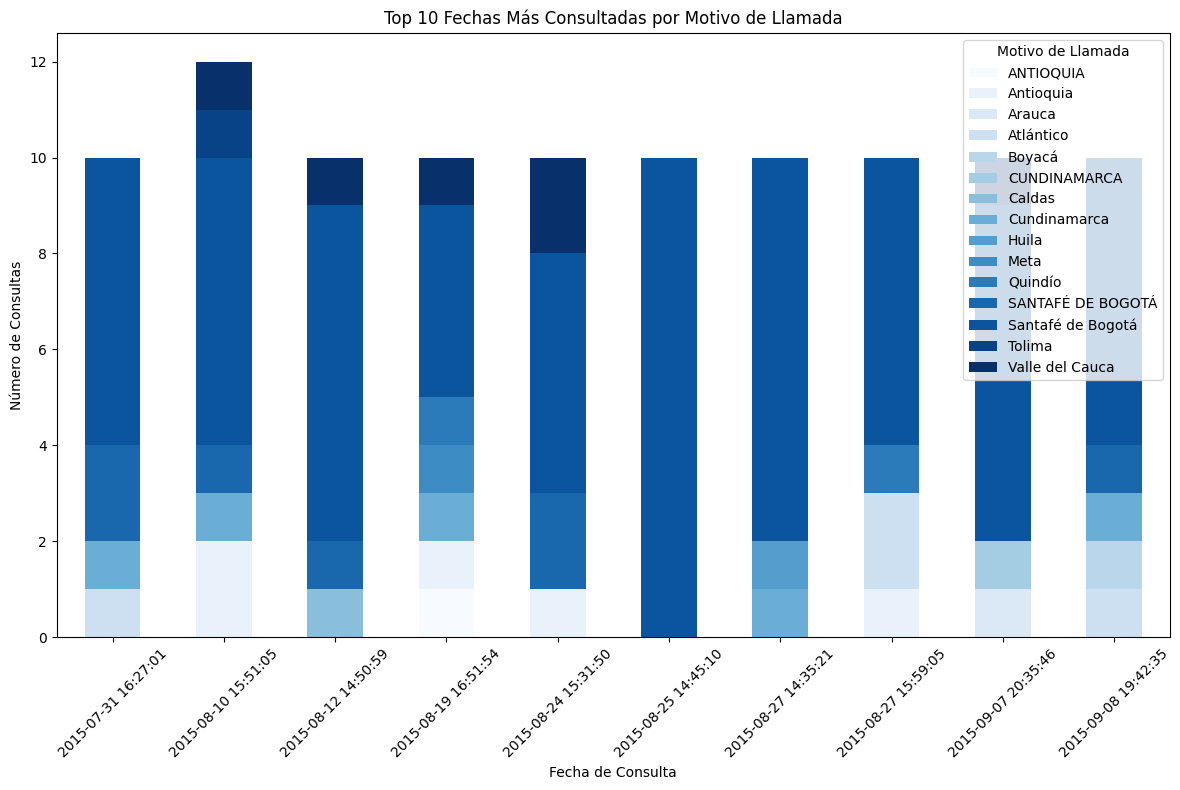

In [32]:
# Obtener las 10 fechas más consultadas

top_10_fechas = datos_completos['Fecha_consulta'].value_counts().head(10).index

# Filtrar el DataFrame para incluir solo las 10 fechas más consultadas
datos_top_fechas = datos_completos[datos_completos['Fecha_consulta'].isin(top_10_fechas)]

# Crear una tabla cruzada para contar las frecuencias de Motivo_llamada por fecha
tabla_cruzada = pd.crosstab(datos_top_fechas['Fecha_consulta'], datos_top_fechas['Departamento'])

# Crear una figura
plt.figure(figsize=(12, 8))

# Gráfico de barras apiladas
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Blues')

# Personalizar el gráfico
plt.title('Top 10 Fechas Más Consultadas por Motivo de Llamada')
plt.xlabel('Fecha de Consulta')
plt.ylabel('Número de Consultas')
plt.xticks(rotation=45)
plt.legend(title='Motivo de Llamada')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-33-42cb387ff3ce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_departamentos.index, y=top_10_departamentos.values, palette='Greens_d')


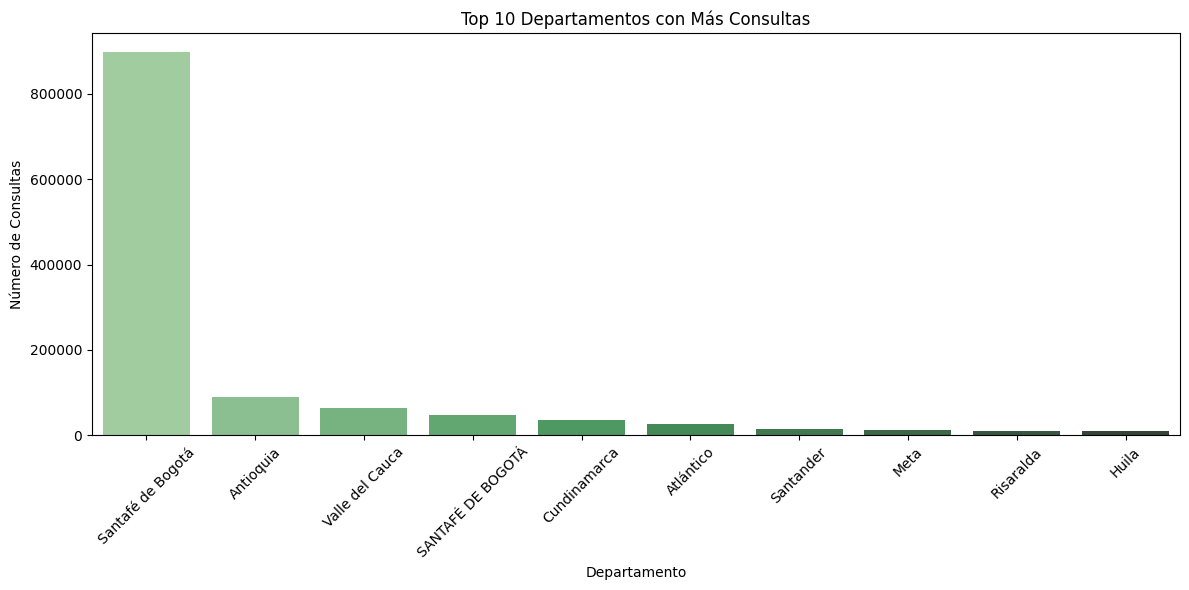

In [33]:
# Obtener los 10 departamentos que más consultan

top_10_departamentos = datos_completos['Departamento'].value_counts().head(10)

# Crear una figura
plt.figure(figsize=(12, 6))

# Gráfico de barras
sns.barplot(x=top_10_departamentos.index, y=top_10_departamentos.values, palette='Greens_d')

# Personalizar el gráfico
plt.title('Top 10 Departamentos con Más Consultas')
plt.xlabel('Departamento')
plt.ylabel('Número de Consultas')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### **conclusiones:**

- El tipo se usuario que se comunica es soltero entre los 33 y los 64 años de edad,  consume en su mayoria el plan tipo 'a' no es moroso y tiene plus, no usa correo pero si usa la app y habita en estratos 2 y 3, es usuario antiguo y segun los datos esta satisfecho del servicio o producto, ya que en su mayoria recomiendan la marca.

- El usuario que ha tenido mejor acogida por este plan o servicio es el usuario de santafe Bogota.

- Los motivos de llamadas mas frecuentes son el m10 y el m11.

- los departamentos que mas llaman a consultar son Valle del cauca , Tolima y Santafe de Bogota.

- El dia que mas consultas se realizaron por llamada fue el 2015-08-10 a las 15:51:05 con los motivos de llamada  m8 y m9 de Valle del cauca y del Tolima.

### **Analisis del usuario**
El cliente típico es un soltero entre 33 y 64 años, de estrato 2-3, con deudas pequeñas y fiel al Plan A. Prefiere resolver consultas rápidas vía app o llamada, valora la inmediatez y recomienda la marca. Su interacción está concentrada en zonas urbanas clave, con necesidades específicas en motivos m10/m11. El rediseño debe priorizar eficiencia digital, atención regionalizada y manejo proactivo de outliers.

## **Recomendaciones para el rediseño del servicio**

- **Personalización por Edad y Estrato:**

 Diseñar soluciones para un rango amplio de edades, priorizando funcionalidades accesibles para estratos 2-3 (ej. paquetes económicos, atención en español sencillo).

- **Fortalecer la App:**

 Dado que los clientes la usan activamente, integrar opciones de autogestión (ej. consulta de deudas, resolución de motivos m10/m11) para reducir llamadas.

- **Manejo de para usuarios atipicos**

 Crear protocolos para clientes con deudas altas (ej. planes de pago flexibles).

 Optimizar la distribución de agentes en horarios pico para reducir tiempos de espera atípicos.

- **Enfoque Geográfico**

 Reforzar equipos en Valle del Cauca, Tolima y Bogotá, y analizar causas detrás de motivos m8-m9 en estas regiones.

## **2). Limpiar datos**

In [34]:
datos_completos.head(5)

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento,Tiene_plan_avanzado,Tipo_Plan,Es_moroso,Tiene_plus,Ha_caido_mora,Correo,usa_app,Forma_pago,Monto_adeudado,Edad,Estrato,Motivo_llamada,Duracion_llamada,Tiempo_en_espera,Transferencia_llamada,primera_llamada,Antiguedad,Recomienda_marca,y
0,340,2015-06-22 16:14:35,Actualización datos,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
1,340,2015-06-22 16:37:02,Agendamiento citas,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
2,340,2015-06-22 15:50:56,Agendamiento citas,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas,soltero,Santafé de Bogotá,no,f,no,si,si,si,no,mensajero,30167.091798,65,3,m17,124.262540,55.257504,no,no,new-new,si,0
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas,soltero,Santafé de Bogotá,no,f,no,si,no,no,si,tienda,11842.044402,30,2,m10,178.120444,4.635882,no,no,mid-age,si,0


In [35]:
datos_completos_limpios = datos_completos.copy()

In [36]:
def replace_valores_categoricos(df,columna,cambiar,cambio):
    '''
    Funcion para unir /casado. con casado y eliminar carlos
    '''
    df[columna] = df[columna].replace(cambiar,cambio)

    return df

datos_completos_limpios = replace_valores_categoricos(datos_completos_limpios,'Tipo_persona','/casado.','casado')
datos_completos_limpios = replace_valores_categoricos(datos_completos_limpios,'Tipo_persona','no sabe','no dijo')

In [37]:
def eliminar_categorias(df,columna,categoria):
    '''
    Funcion para eliminar categorias que no aporten informacion importante de una columna
    '''

    df = df[df[columna] != categoria]

    return df

datos_completos_limpios = eliminar_categorias(datos_completos_limpios,'Tipo_persona','carlos')
datos_completos_limpios = eliminar_categorias(datos_completos_limpios,'Motivo_llamada','azzx456!')
datos_completos_limpios = eliminar_categorias(datos_completos_limpios,'Tipo_Plan','00000')

In [38]:
def moda_cat(df,columna):
    '''
    Funcion para reemplazar los nan de una columna categorica por la moda
    '''

    data = df[columna]
    serie = pd.Series(data)
    moda = serie.mode()[0]  # [0] para tomar el primer valor si hay múltiples modas

    # Reemplazar NaN
    serie_limpia = serie.fillna(moda)

    # Actualizar la columna original
    df[columna] = serie_limpia

    return df

datos_completos_limpios = moda_cat(datos_completos_limpios,'Tipo_persona')
datos_completos_limpios = moda_cat(datos_completos_limpios,'Motivo_llamada')

In [39]:
def corregir_Departamento(df):
    '''
      Corregir nombres de departamentos.
      Normalizar texto (quitar espacios, acentos, mayúsculas)
    '''
    df["Departamento"] = (
        df["Departamento"]
        .str.strip()  # Eliminar espacios al inicio/final
        .str.lower()  # Todo a minúsculas
        .str.title()  # Formato Título
    )
    return df

datos_completos_limpios = corregir_Departamento(datos_completos_limpios)

In [40]:
# Eliminar filas con NaN en cualquier columna:
datos_completos_limpios = datos_completos_limpios.dropna()

In [41]:
#creamos nuevamente listas de numericos y categoricos
list_num2 = datos_completos_limpios.select_dtypes(include = ['float64','int64']).columns.to_list()
list_cat2 = datos_completos_limpios.select_dtypes(include = ['object']).columns.to_list()

In [42]:
# Usamos esta funcion para eliminar lo valores mas atipicos utilizando los cuartiles

def eliminar_atipicos(df, list_numeric):
    mascara = pd.Series(True, index=df.index)
    for c in list_numeric:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.95)
        IBR = Q3 - Q1
        rango_infe = Q1 - 1.5 * IBR
        rango_sup = Q3 + 1.5 * IBR
        mascara &= (df[c] >= rango_infe) & (df[c] <= rango_sup)
    return df[mascara]

datos_completos_limpios  = eliminar_atipicos(datos_completos_limpios,list_num2)

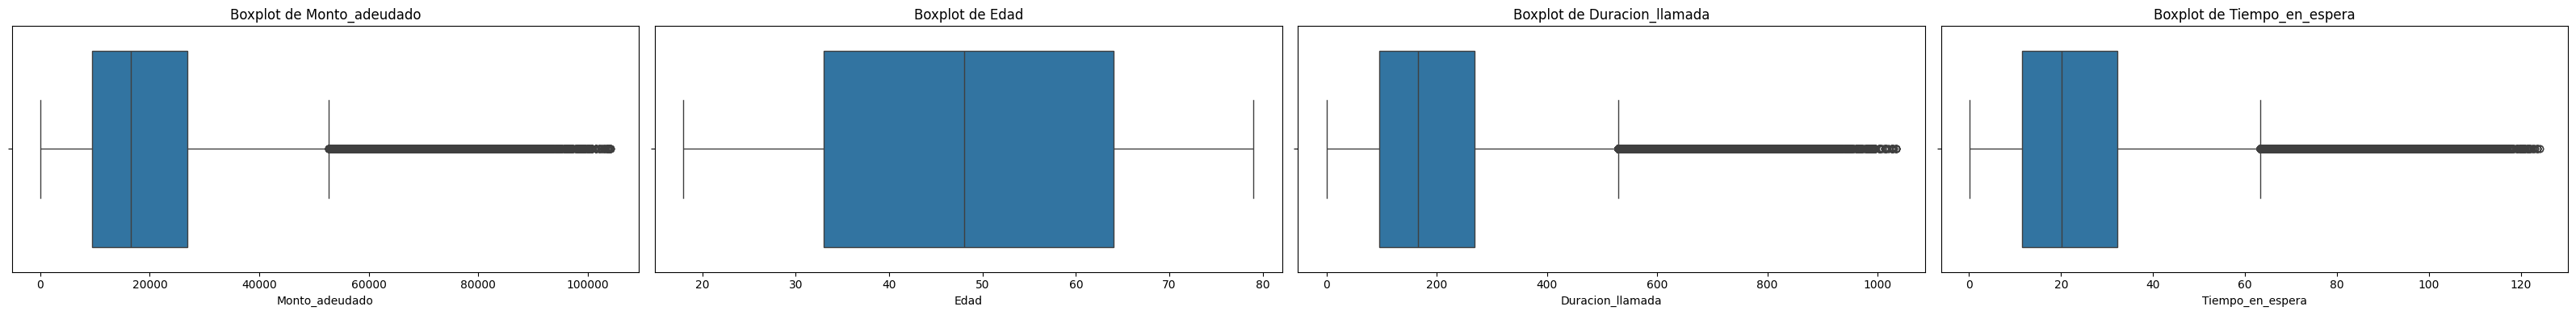

In [43]:
# Visualizamos graficamente la eliminacion de los datos mas aatipicos de las variables numericas
boxplots_num(list_num2,datos_completos_limpios)

In [44]:
"""
Con esta funcion imputamos algunos de los valores atipicos , ya sea por la media o por el percentil95.
Tambien encontramos valores que descirben los datos atipicos dentro de unba distribucion mas cercana a la normalidad
esto puede ayudar al modelo a generalizar mejor la informacion.
"""

list_num__outliers = ['Monto_adeudado','Duracion_llamada','Tiempo_en_espera']


def imputar_outliers(df, list_numeric, metodo="percentil95", multiplicador=3):
    df_imputado = df.copy()
    for col in list_numeric:
        Q1 = df_imputado[col].quantile(0.25)
        Q3 = df_imputado[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - multiplicador * IQR
        limite_superior = Q3 + multiplicador * IQR

        # Seleccionar valor de reemplazo
        if metodo == "mediana":
            valor_reemplazo = df_imputado[col].median()
        elif metodo == "percentil95":
            valor_reemplazo = df_imputado[col].quantile(0.95)
        else:
            raise ValueError("Método no válido. Usar 'mediana' o 'percentil95'")

        # Reemplazar outliers
        df_imputado[col] = np.where(
            (df_imputado[col] < limite_inferior) | (df_imputado[col] > limite_superior),
            valor_reemplazo,
            df_imputado[col]
        )
    return df_imputado

datos_completos_limpios = imputar_outliers(datos_completos_limpios, list_num__outliers)

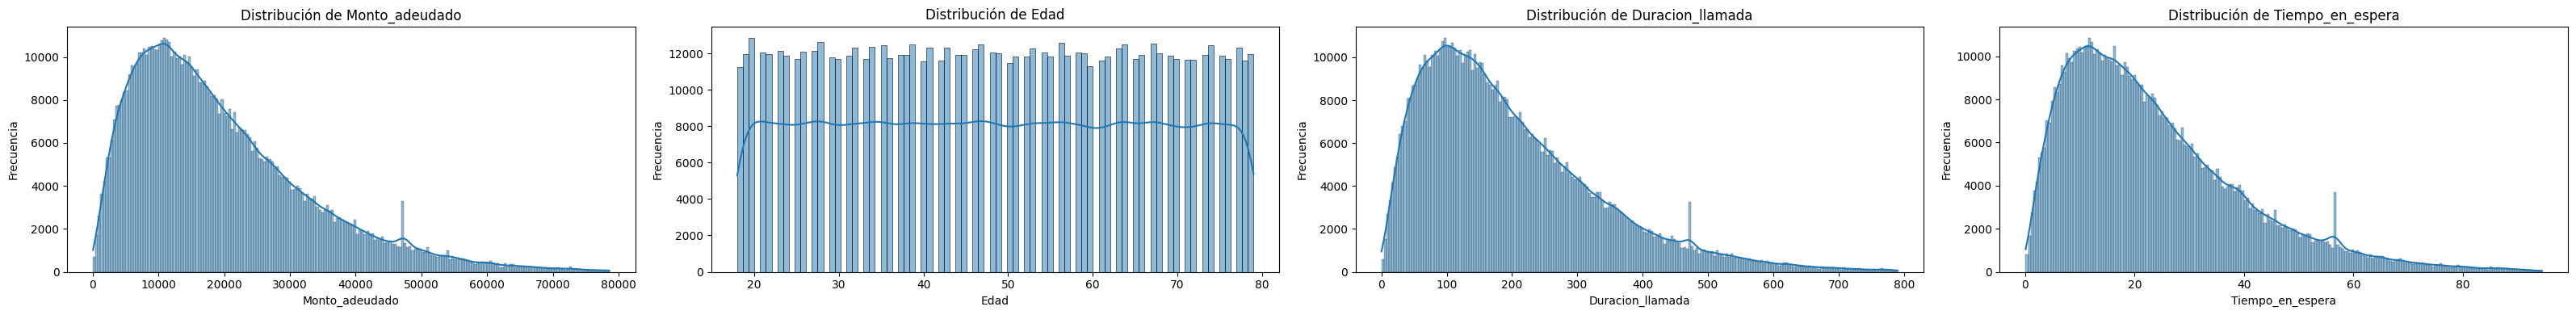

In [45]:
hist_numeric(list_num2,datos_completos_limpios)

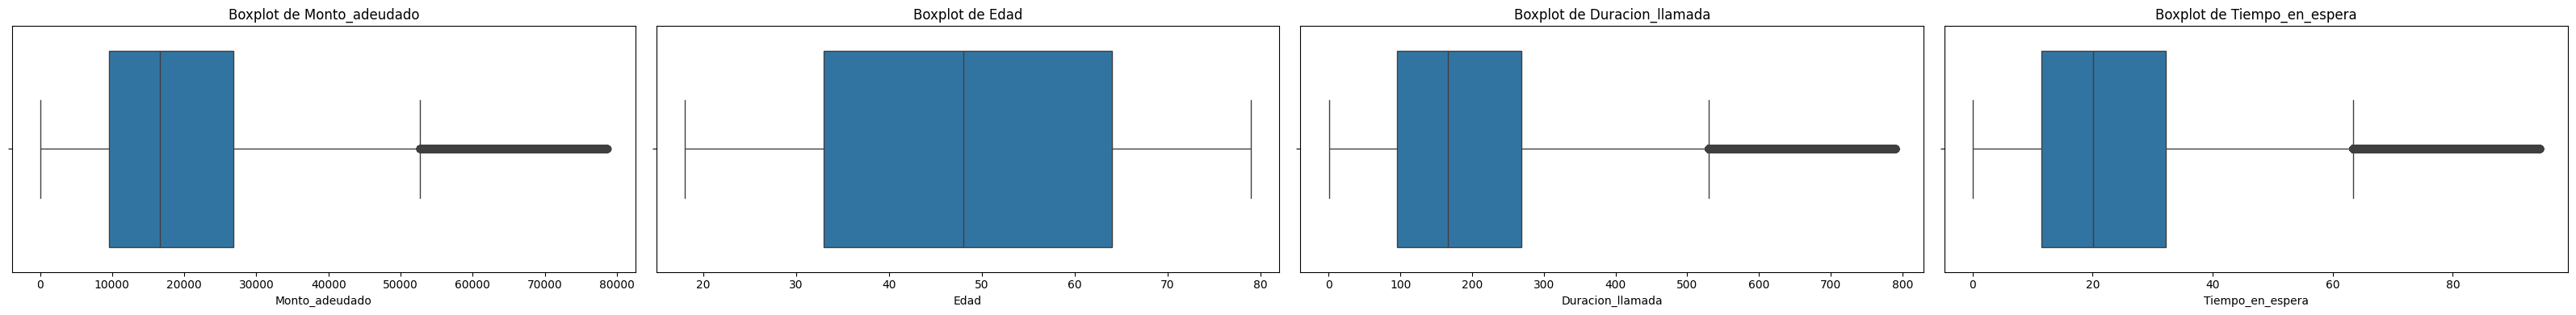

In [46]:
boxplots_num(list_num2,datos_completos_limpios)

In [47]:
list_category = ['Tipo_consulta','Tipo_persona','Departamento','Tiene_plan_avanzado','Tipo_Plan','Es_moroso','Tiene_plus',
                    'Ha_caido_mora','Correo','usa_app','Forma_pago','Estrato','Transferencia_llamada','primera_llamada','Antiguedad','Recomienda_marca']


def columns_category(df,list_category):
    '''
      Convertir columnas a tipo category
    '''
    for column in list_category:
        df[column] = df[column].astype("category")
    return df

datos_completos_limpios = columns_category(datos_completos_limpios,list_category)

In [49]:
#Verificamos que las columnas queden con el tipo de dato category
datos_completos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743252 entries, 3 to 1282956
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID_Cuenta              743252 non-null  object        
 1   Fecha_consulta         743252 non-null  datetime64[ns]
 2   Tipo_consulta          743252 non-null  category      
 3   Tipo_persona           743252 non-null  category      
 4   Departamento           743252 non-null  category      
 5   Tiene_plan_avanzado    743252 non-null  category      
 6   Tipo_Plan              743252 non-null  category      
 7   Es_moroso              743252 non-null  category      
 8   Tiene_plus             743252 non-null  category      
 9   Ha_caido_mora          743252 non-null  category      
 10  Correo                 743252 non-null  category      
 11  usa_app                743252 non-null  category      
 12  Forma_pago             743252 non-null  category

In [50]:
# Verificar que los datoss ahora esten sin valores NaN
total_Usuarios = datos_completos_limpios.isnull().sum().sort_values(ascending=False)
porcentaje =  (datos_completos_limpios.isnull().sum() / datos_completos_limpios.isnull().count()).sort_values(ascending=False)
df__Null_Limpios = pd.concat([total_Usuarios,porcentaje], axis = 1 , keys = ['Total' , 'Porcentajes'])
df__Null_Limpios.head(5)

,Total,Porcentajes
ID_Cuenta,0,0.0
Fecha_consulta,0,0.0
Tipo_consulta,0,0.0
Tipo_persona,0,0.0
Departamento,0,0.0


In [51]:
datos_completos_limpios.head(5)

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento,Tiene_plan_avanzado,Tipo_Plan,Es_moroso,Tiene_plus,Ha_caido_mora,Correo,usa_app,Forma_pago,Monto_adeudado,Edad,Estrato,Motivo_llamada,Duracion_llamada,Tiempo_en_espera,Transferencia_llamada,primera_llamada,Antiguedad,Recomienda_marca,y
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas,soltero,Santafé De Bogotá,no,f,no,si,si,si,no,mensajero,30167.091798,65,3,m17,124.262540,55.257504,no,no,new-new,si,0
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas,soltero,Santafé De Bogotá,no,f,no,si,no,no,si,tienda,11842.044402,30,2,m10,178.120444,4.635882,no,no,mid-age,si,0
5,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 21:15:50,Agendamiento citas,soltero,Santafé De Bogotá,no,f,no,si,no,no,si,tienda,11842.044402,30,2,m10,178.120444,4.635882,no,no,mid-age,si,0
6,1640de7c-ba08-cdfc-c21b-517fd7c5a259,2015-07-17 15:31:42,Peticiones y quejas,soltero,Santafé De Bogotá,no,f,si,si,no,no,si,online,39601.288181,32,4,m18,332.970456,30.698536,no,no,Legend,no,0
7,1640de7c-ba08-cdfc-c21b-517fd7c5a259,2015-07-27 23:06:23,Procesos web,soltero,Santafé De Bogotá,no,f,si,si,no,no,si,online,39601.288181,32,4,m18,332.970456,30.698536,no,no,Legend,no,0


In [52]:
datos_final_limpios = datos_completos_limpios.copy()

## **Correlacion y pruebas de hipotesis**

### Para las variables numericas

### Matriz de correlacion - Para relaciones lineales.



In [53]:
# Calcular correlación punto-biserial (equivalente a Pearson)
from scipy.stats import pointbiserialr
import pandas as pd

def correlacion_lineal(df, target):
    """
    Calcula la correlación lineal (Pearson/Punto-Biserial) entre variables numéricas y un target binario.

    """
    # Filtrar solo numéricas y excluir el target
    numeric_vars = df.select_dtypes(include=['number']).columns.tolist()
    if target in numeric_vars:
        numeric_vars.remove(target)

    # Calcular matriz de correlación
    corr_matrix = df[numeric_vars + [target]].corr(numeric_only=True)
    corr_with_target = corr_matrix[target].sort_values(ascending=False)

    return corr_with_target

correlacion_lineal(datos_final_limpios, 'y')

,y
y,1.000000
Edad,0.001611
Tiempo_en_espera,0.001405
Duracion_llamada,0.000554
Monto_adeudado,0.000087


### Análisis no paramétricos

Para relaciones no lineales, combinamos Spearman + Mutual Information.

In [ ]:
from scipy.stats import spearmanr, pointbiserialr
from sklearn.feature_selection import mutual_info_classif


def analizar_no_lineal(df, target, mi_threshold=0.05):
    """
    Analiza relaciones no lineales y dependencia estadística entre variables numéricas y un target binario.

    """
    # Filtrar solo numéricas y excluir el target
    numeric_vars = df.select_dtypes(include=['number']).columns.tolist()
    if target in numeric_vars:
        numeric_vars.remove(target)

    results = []
    for var in numeric_vars:
        # Correlación Punto-Biserial (equivalente a Pearson para target binario)
        pb_corr, pb_pval = pointbiserialr(df[var], df[target])

        # Correlación de Spearman (relaciones monótonas no lineales)
        spear_corr, spear_pval = spearmanr(df[var], df[target])

        # Mutual Information (dependencia estadística general)
        mi_score = mutual_info_classif(df[[var]], df[target])[0]

        results.append({
            'Variable': var,
            'PBS_Corr': pb_corr,
            'PBS_pval': pb_pval,
            'Spearman_Corr': spear_corr,
            'MI': mi_score
        })

    df_results = pd.DataFrame(results)
    df_results = df_results.sort_values(by='MI', ascending=False)

    # Filtrar por MI relevante (opcional)
    df_results = df_results[df_results['MI'] > mi_threshold]

    return df_results

analizar_no_lineal(datos_final_limpios, 'y', mi_threshold=0.05)

,Variable,PBS_Corr,PBS_pval,Spearman_Corr,MI
3,Tiempo_en_espera,0.000437,0.709219,-0.000476,0.419242
0,Monto_adeudado,0.001897,0.105484,0.003557,0.419041
2,Duracion_llamada,0.000331,0.777768,0.000455,0.417955


  Realiza un análisis completo de correlación (lineal y no lineal) entre variables numéricas y el target binario.

### Para las variables categoricas

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from sklearn.preprocessing import OneHotEncoder

**chi2_test (Prueba de Chi-Cuadrado)**

Parámetro Clave: p_chi2 (p-valor).
Valores a Analizar:

- p_chi2 < 0.05: Rechaza la hipótesis nula → Hay asociación significativa entre la variable categórica y el target.

- p_chi2 >= 0.05: No hay evidencia suficiente para afirmar asociación.

In [ ]:
def chi2_test(df, target_var):
    results = []
    cat_vars = df.select_dtypes(include=['object','category']).columns.tolist()

    elementos_a_eliminar = [target_var, 'ID_Cuenta', 'Fecha_consulta']

    for elemento in elementos_a_eliminar:
        if elemento in cat_vars:  # Verificar si el elemento existe para evitar errores
            cat_vars.remove(elemento)

    for var in cat_vars:
        tabla = pd.crosstab(df[var], df[target_var])
        chi2, p_val, _, _ = chi2_contingency(tabla)
        results.append({"Variable": var, "Chi2": chi2, "p-value": p_val})
    return pd.DataFrame(results).sort_values(by="p-value")

chi2_test(datos_final_limpios, 'y')

,Variable,Chi2,p-value
12,Motivo_llamada,236.776550,1.164298e-32
2,Departamento,147.445132,2.069875e-16
4,Tipo_Plan,52.322567,4.632403e-10
11,Estrato,35.714621,3.131971e-06
16,Recomienda_marca,17.236125,1.808102e-04
0,Tipo_consulta,21.919569,2.079455e-04
10,Forma_pago,15.677839,3.940947e-04
3,Tiene_plan_avanzado,11.751308,6.080050e-04
1,Tipo_persona,19.071482,7.609312e-04
5,Es_moroso,10.055579,1.518873e-03


**kruskal_test (Prueba de Kruskal-Wallis)**

Parámetro Clave: p_kruskal (p-valor).

- p_kruskal < 0.05: Existen diferencias significativas en la distribución de y entre categorías.

- p_kruskal >= 0.05: No hay diferencias significativas.

In [ ]:
def kruskal_test(df, target_var):
    results = []

    cat_vars = df.select_dtypes(include=['object','category']).columns.tolist()

    elementos_a_eliminar = [target_var, 'ID_Cuenta', 'Fecha_consulta']

    for elemento in elementos_a_eliminar:
        if elemento in cat_vars:  # Verificar si el elemento existe para evitar errores
            cat_vars.remove(elemento)

    for var in cat_vars:
        grupos = [df[df[var] == cat][target_var] for cat in df[var].unique()]
        stat, p_val = kruskal(*grupos)
        results.append({"Variable": var, "H-statistic": stat, "p-value": p_val})
    return pd.DataFrame(results).sort_values(by="p-value")

kruskal_test(datos_final_limpios, 'y')

,Variable,H-statistic,p-value
12,Motivo_llamada,236.776225,1.164462e-32
2,Departamento,147.444929,2.070041e-16
4,Tipo_Plan,52.322495,4.632560e-10
11,Estrato,35.714572,3.132039e-06
16,Recomienda_marca,17.236101,1.808124e-04
0,Tipo_consulta,21.919538,2.079484e-04
10,Forma_pago,15.677817,3.940989e-04
3,Tiene_plan_avanzado,11.782114,5.980253e-04
1,Tipo_persona,19.071456,7.609402e-04
5,Es_moroso,10.077055,1.501271e-03


**mutual_info_test_mejorado (Información Mutua)**

Parámetro Clave: Mutual_Information (MI).


- MI > 0.1: Dependencia fuerte entre la categoría y el target.

- 0.05 < MI ≤ 0.1: Dependencia moderada.

- MI ≤ 0.05: Dependencia débil o nula.

In [ ]:
def mutual_info_test_mejorado(df, target_var):

    cat_vars = df.select_dtypes(include=['object','category']).columns.tolist()

    elementos_a_eliminar = [target_var, 'ID_Cuenta', 'Fecha_consulta']

    for elemento in elementos_a_eliminar:
        if elemento in cat_vars:  # Verificar si el elemento existe para evitar errores
            cat_vars.remove(elemento)

    # One-Hot Encoding
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    X_encoded = encoder.fit_transform(df[cat_vars])

    # Calcular Mutual Information
    mi_scores = mutual_info_classif(X_encoded, df[target_var], discrete_features=True)

    # Crear DataFrame con resultados (nombres de categorías)
    categories = encoder.get_feature_names_out(cat_vars)
    df_results = pd.DataFrame({
        "Categoría": categories,
        "Mutual_Information": mi_scores
    }).sort_values(by="Mutual_Information", ascending=False)

    return df_results.head(10)

mutual_info_test_mejorado(datos_final_limpios, 'y')

,Categoría,Mutual_Information
92,Motivo_llamada_m29,0.000025
51,Tipo_Plan_f,0.000021
104,Motivo_llamada_m8,0.000016
84,Motivo_llamada_m20,0.000016
66,Estrato_2,0.000016
48,Tipo_Plan_c,0.000015
17,Departamento_Caquetá,0.000013
86,Motivo_llamada_m22,0.000012
91,Motivo_llamada_m28,0.000012
2,Tipo_consulta_Información general,0.000011


## **Conclusión sobre la seleccion de variables**

La selección de pruebas de correlación se basó en cubrir distintos tipos de relaciones (lineales, no lineales, de orden y distribuciones) y en alinearse con la naturaleza de las variables y el modelo (LightGBM, que prioriza dependencias no lineales).

## **Para Variables Categóricas:**

**Información Mutua (MI):**

- Captura dependencias no lineales, clave para modelos basados en árboles como LightGBM.

- Identifica variables que reducen incertidumbre en la predicción, incluso si la relación no es estadísticamente significativa.

**Chi²:**

- Filtra variables sin asociación global con el target (p-valor < 0.05), evitando "ruido" en el modelo.

**Kruskal-Wallis:**

- Detecta diferencias en distribuciones del target entre categorías, robusto ante desbalanceo de clases.

## **Para Variables Numéricas:**

**Correlación Lineal (Pearson):**

- Evalúa relaciones lineales entre variables numéricas y el target.

**Spearman:**

- Captura relaciones monótonas no lineales (ej: crecimiento exponencial).

**Mutual Information:**

- Complementa detectando dependencias complejas no lineales, útiles para modelos no paramétricos.

# **Codificacion de los datos**

In [54]:
variables_para_codificar = ['Tiempo_en_espera','Monto_adeudado','Duracion_llamada','Edad','Motivo_llamada',
                            'Departamento','Forma_pago','Recomienda_marca','Antiguedad','Tipo_Plan','y']

datos_limpios_codificados = datos_final_limpios[variables_para_codificar]
datos_limpios_codificados

,Tiempo_en_espera,Monto_adeudado,Duracion_llamada,Edad,Motivo_llamada,Departamento,Forma_pago,Recomienda_marca,Antiguedad,Tipo_Plan,y
3,55.257504,30167.091798,124.262540,65,m17,Santafé De Bogotá,mensajero,si,new-new,f,0
4,4.635882,11842.044402,178.120444,30,m10,Santafé De Bogotá,tienda,si,mid-age,f,0
5,4.635882,11842.044402,178.120444,30,m10,Santafé De Bogotá,tienda,si,mid-age,f,0
6,30.698536,39601.288181,332.970456,32,m18,Santafé De Bogotá,online,no,Legend,f,0
7,30.698536,39601.288181,332.970456,32,m18,Santafé De Bogotá,online,no,Legend,f,0
...,...,...,...,...,...,...,...,...,...,...,...
1282948,11.568264,10241.090850,402.905241,72,m27,Santafé De Bogotá,online,no,new-new,b,0
1282950,24.525105,5374.714556,165.077883,28,m18,Santafé De Bogotá,online,talvez,new-new,a,0
1282951,0.667793,4122.508641,222.916882,77,m11,Santafé De Bogotá,online,si,Legend,f,0
1282952,9.665856,40841.026395,72.252318,20,m36,Santafé De Bogotá,tienda,si,new-new,c,1


In [55]:
list_encoding_one = ['Forma_pago','Recomienda_marca','Antiguedad','Tipo_Plan']

#Codificamos las variables que tiene entre 0 y 5 categorias
def encoding_cat(df,list_encoding):
    df = pd.get_dummies(df, columns=list_encoding, drop_first=False, dtype=int)
    return df

datos_limpios_codificados =  encoding_cat(datos_limpios_codificados,list_encoding_one)

In [56]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [57]:
from category_encoders import TargetEncoder

list_encoding_Label = ['Motivo_llamada','Departamento']

#Codificamos las variables que tiene mas de 5 categorias
def Target_Encoding(df,list_encoding):
    # Aplicar Target Encoding
    encoder = TargetEncoder(cols=list_encoding, smoothing=10)
    df = encoder.fit_transform(df, df['y'])

    return df

datos_limpios_codificados =  Target_Encoding(datos_limpios_codificados,list_encoding_Label)


In [60]:
datos_limpios_codificados

,Tiempo_en_espera,Monto_adeudado,Duracion_llamada,Edad,Motivo_llamada,Departamento,y,Forma_pago_mensajero,Forma_pago_online,Forma_pago_tienda,Recomienda_marca_no,Recomienda_marca_si,Recomienda_marca_talvez,Antiguedad_Legend,Antiguedad_Young,Antiguedad_mid-age,Antiguedad_new-new,Tipo_Plan_a,Tipo_Plan_b,Tipo_Plan_c,Tipo_Plan_d,Tipo_Plan_e,Tipo_Plan_f
3,55.257504,30167.091798,124.262540,65,0.245370,0.248702,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,4.635882,11842.044402,178.120444,30,0.252043,0.248702,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
5,4.635882,11842.044402,178.120444,30,0.252043,0.248702,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
6,30.698536,39601.288181,332.970456,32,0.242622,0.248702,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
7,30.698536,39601.288181,332.970456,32,0.242622,0.248702,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282948,11.568264,10241.090850,402.905241,72,0.237957,0.248702,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1282950,24.525105,5374.714556,165.077883,28,0.242622,0.248702,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
1282951,0.667793,4122.508641,222.916882,77,0.243579,0.248702,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1282952,9.665856,40841.026395,72.252318,20,0.243380,0.248702,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [61]:
datos_limpios_codificados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743252 entries, 3 to 1282956
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tiempo_en_espera         743252 non-null  float64
 1   Monto_adeudado           743252 non-null  float64
 2   Duracion_llamada         743252 non-null  float64
 3   Edad                     743252 non-null  int64  
 4   Motivo_llamada           743252 non-null  float64
 5   Departamento             743252 non-null  float64
 6   y                        743252 non-null  int64  
 7   Forma_pago_mensajero     743252 non-null  int64  
 8   Forma_pago_online        743252 non-null  int64  
 9   Forma_pago_tienda        743252 non-null  int64  
 10  Recomienda_marca_no      743252 non-null  int64  
 11  Recomienda_marca_si      743252 non-null  int64  
 12  Recomienda_marca_talvez  743252 non-null  int64  
 13  Antiguedad_Legend        743252 non-null  int64  
 14  Antigued

In [63]:
#Verificamos nuevamente el valance de la variable objetivo
datos_limpios_codificados['y'].value_counts()

,count
y,
0,558510
1,184742


In [64]:
# separamos la svariables, features para entrenamiento y la variablee objtivo
x = datos_limpios_codificados.drop('y', axis=1)
y = datos_limpios_codificados['y']

In [65]:
#dividimos los datos en 70% para entrenamiento y 30% para evaluar
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


##**MODELO 1 ->  catboost**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.utils import class_weight



clases = np.unique(y_train)

# Calcula los pesos de las clases utilizando la estrategia 'balanced'
pesos = class_weight.compute_class_weight('balanced', classes=clases, y=y_train)
pesos_dict = dict(zip(clases, pesos))


Modelo1 = CatBoostClassifier(random_state = 123,
                                verbose = False,
                                max_depth = 6,
                                class_weights=pesos_dict) # Inplemento el diccionario de pesos para el balanceo


Modelo1.fit(x_train,y_train)

In [ ]:
#Validacion cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
cv = cross_validate(Modelo1, x_train, y_train, cv = kf, return_train_score = True , scoring = ['roc_auc'])

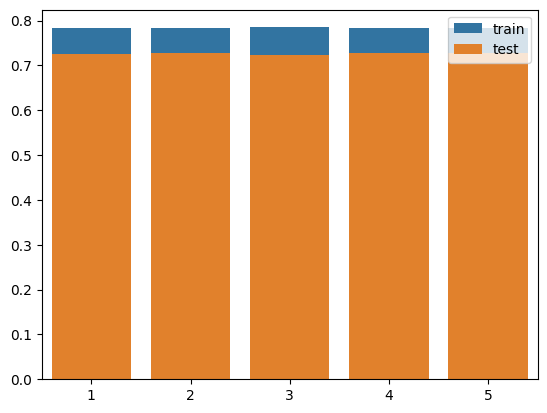

In [ ]:
sns.barplot( x = np.arange(1,6), y = cv['train_roc_auc'] , label = 'train')
sns.barplot( x = np.arange(1,6), y = cv['test_roc_auc'] , label = 'test')
plt.show()

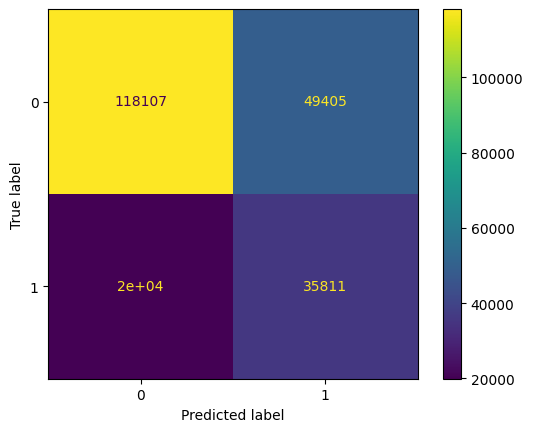

accuracy_score:  0.6894546822787418
sensivilidad:  0.6425341802131553
especificidad:  0.7050659057261569
roc_auc_score:  0.6738000429696562


In [ ]:
#Grafica  matriz de confucion
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score

threshold = 0.5
preds = np.where(Modelo1.predict_proba(x_test)[:,1]>threshold,1,0)

cm = confusion_matrix(y_test,preds)
diplay = ConfusionMatrixDisplay(cm)
diplay.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds))
print('sensivilidad: ',recall_score(y_test,preds,pos_label=1))
print('especificidad: ',recall_score(y_test,preds,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds))

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.8 MB/s eta 0:00:00


### **Optimizamos el universo de hiperparametros para el modelo 1**

In [ ]:
#Optimizamos los hiper parametros del modelo CatBoost
import optuna
from sklearn.utils import class_weight
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold



def objective(trial):
    param = {

        "iterations": trial.suggest_int("iterations", 100, 500, step=50), # Reducido el máximo
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 0.4), # Rango más centrado
        "depth": trial.suggest_int("depth", 4, 8), # Rango un poco más estrecho
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15), # Límite superior más bajo
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5), # Rango más ajustado
        "random_strength": trial.suggest_float("random_strength", 0.3, 0.8), # Rango más centrado
        "border_count": trial.suggest_int("border_count", 64, 192) # Rango más estrecho


            }

    kf = KFold(n_splits=5)

    # Calcular los pesos de las clases para el dataset de entrenamiento
    clases = np.unique(y_train)
    pesos = class_weight.compute_class_weight('balanced', classes=clases, y=y_train)
    pesos_dict = dict(zip(clases, pesos))

    Modelo_Optimizado1 = CatBoostClassifier(random_state = 123,
                                            verbose = False,
                                            class_weights=pesos_dict, # Agrega el parámetro class_weights
                                            **param)

    cv = cross_validate(Modelo_Optimizado1, x_train, y_train, cv = kf, return_train_score = True , scoring = ['roc_auc'])
    auc = np.mean(cv['test_roc_auc'])
    dispersion = np.std(cv['test_roc_auc'])
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2025-04-21 18:54:23,051] A new study created in memory with name: no-name-41992be8-66df-47c8-8101-369168991029
[I 2025-04-21 18:57:40,680] Trial 0 finished with value: 0.5897601833943029 and parameters: {'iterations': 500, 'colsample_bylevel': 0.22062422421532732, 'depth': 4, 'learning_rate': 0.10043018043972257, 'l2_leaf_reg': 1.0651879934855715, 'random_strength': 0.600560710240111, 'border_count': 92}. Best is trial 0 with value: 0.5897601833943029.
[I 2025-04-21 19:01:21,870] Trial 1 finished with value: 0.6538929359732595 and parameters: {'iterations': 450, 'colsample_bylevel': 0.10602254220076651, 'depth': 7, 'learning_rate': 0.14400350187955008, 'l2_leaf_reg': 4.513555882550263, 'random_strength': 0.7720242919171769, 'border_count': 138}. Best is trial 1 with value: 0.6538929359732595.
[I 2025-04-21 19:02:21,677] Trial 2 finished with value: 0.6174421276096029 and parameters: {'iterations': 100, 'colsample_bylevel': 0.3128641418088047, 'depth': 7, 'learning_rate': 0.107558943

In [ ]:
study.best_params

{'iterations': 350,
 'colsample_bylevel': 0.3264562316571324,
 'depth': 6,
 'learning_rate': 0.13435206211549097,
 'l2_leaf_reg': 2.854792827276022,
 'random_strength': 0.7573608180144937,
 'border_count': 165}

## **MODELO 2 ->   LGBM**

In [ ]:
import lightgbm as lgb
#balanceo
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

Modelo2 = lgb.LGBMClassifier(
    random_state=123,
    objective='binary',
    scale_pos_weight=pos_weight,  # Peso ajustado
    n_estimators=100,
    learning_rate=0.1
)
Modelo2.fit(x_train, y_train)  # Datos originales (sin SMOTE)
print('pos_weight: ', pos_weight)

[LightGBM] [Info] Number of positive: 126766, number of negative: 382912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 509678, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248718 -> initscore=-1.105462
[LightGBM] [Info] Start training from score -1.105462
pos_weight:  3.0206206711578814


In [ ]:
##Validacion cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf2 = KFold(n_splits=5)
cv2 = cross_validate(Modelo2, x_train, y_train, cv = kf2, return_train_score = True , scoring = ['roc_auc'])

[LightGBM] [Info] Number of positive: 103720, number of negative: 313005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 416725, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248893 -> initscore=-1.104524
[LightGBM] [Info] Start training from score -1.104524
[LightGBM] [Info] Number of positive: 103420, number of negative: 313305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 416725, number of used features: 21
[LightGBM] [In

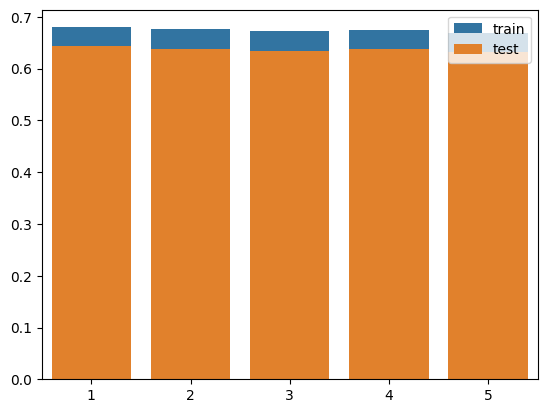

In [ ]:
sns.barplot( x = np.arange(1,6), y = cv2['train_roc_auc'] , label = 'train')
sns.barplot( x = np.arange(1,6), y = cv2['test_roc_auc'] , label = 'test')
plt.show()


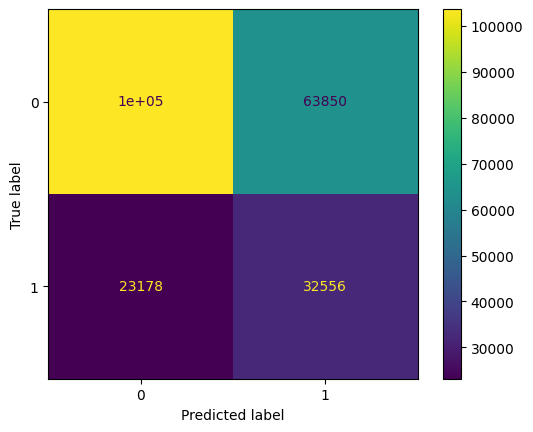

accuracy_score:  0.6101699470539226
sensivilidad:  0.584131768758747
especificidad:  0.618833277615932
Precisión: 0.337696823849138
F1-Score: 0.42797423425792036
roc_auc_score:  0.658098528986998


In [ ]:
#Grafica  matriz de confucion
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,f1_score

threshold2 = 0.5

preds2 = np.where(Modelo2.predict_proba(x_test)[:,1]>threshold2,1,0)
y_proba_lgb = Modelo2.predict_proba(x_test)[:, 1]

cm2 = confusion_matrix(y_test,preds2)
diplay2 = ConfusionMatrixDisplay(cm2)
diplay2.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds2))
print('sensivilidad: ',recall_score(y_test,preds2,pos_label=1))
print('especificidad: ',recall_score(y_test,preds2,pos_label=0))
print('Precisión:', precision_score(y_test, preds2, pos_label=1)) # De todas las predicciones positivas que hizo el modelo, ¿cuántas fueron correctas?
print('F1-Score:', f1_score(y_test, preds2, pos_label=1))
print('roc_auc_score: ',roc_auc_score(y_test,y_proba_lgb))



### **Optimizamos el universo de hiperparametros para el modelo 2**

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Calcular el peso de la clase positiva ANTES de la optimización (fuera de la función objective)
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

def objective(trial):

    params = {

        "n_estimators": trial.suggest_int("n_estimators", 50, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100, step=10),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100, step=10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 1),

    }



    model = lgb.LGBMClassifier(
        objective="binary",
        random_state=123,
        scale_pos_weight=pos_weight,
        **params
    )



    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = cross_validate(model, x_train, y_train, cv=kf, scoring="roc_auc", n_jobs=-1)
    return np.mean(cv_results["test_score"])

# Optimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_params["scale_pos_weight"] = pos_weight

[I 2025-04-21 19:24:28,366] A new study created in memory with name: no-name-322d4665-1b09-4348-8339-b32681b9a1af
[I 2025-04-21 19:24:58,472] Trial 0 finished with value: 0.5345834780226194 and parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.010884065652144401, 'num_leaves': 70, 'min_child_samples': 80, 'subsample': 0.6498000080378392, 'colsample_bytree': 0.6605261134029896, 'reg_alpha': 0.4388608097766026, 'reg_lambda': 0.8736597633348852}. Best is trial 0 with value: 0.5345834780226194.
[I 2025-04-21 19:25:42,672] Trial 1 finished with value: 0.5610652492100381 and parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05405181583825239, 'num_leaves': 20, 'min_child_samples': 70, 'subsample': 0.867484101575153, 'colsample_bytree': 0.95309886550236, 'reg_alpha': 0.09491342418830317, 'reg_lambda': 0.2885950144366377}. Best is trial 1 with value: 0.5610652492100381.
[I 2025-04-21 19:25:56,002] Trial 2 finished with value: 0.6387757410331897 and paramet

In [ ]:
study.best_params

{'n_estimators': 500,
 'max_depth': 8,
 'learning_rate': 0.19718444232497923,
 'num_leaves': 100,
 'min_child_samples': 10,
 'subsample': 0.7270568032371555,
 'colsample_bytree': 0.8457142135889757,
 'reg_alpha': 0.5913449913964478,
 'reg_lambda': 0.9659395606047502}

### **Implementamos los hiperparametros optimizados en el modelo 2**

[LightGBM] [Info] Number of positive: 129212, number of negative: 391694
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 520906, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248052 -> initscore=-1.109026
[LightGBM] [Info] Start training from score -1.109026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


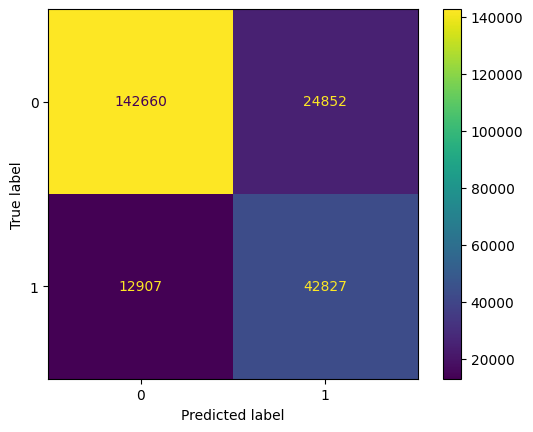

accuracy_score:  0.8308637108839576
sensivilidad:  0.7684178418918434
especificidad:  0.8516404794880367
Precisión: 0.6327959928485941
F1-Score: 0.694043577256853
roc_auc_score:  0.8941111448156418


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,f1_score

pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

params = {'n_estimators': 500,
          'max_depth': 8,
          'learning_rate': 0.19718444232497923,
          'num_leaves': 100,
          'min_child_samples': 10,
          'subsample': 0.7270568032371555,
          'colsample_bytree': 0.8457142135889757,
          'reg_alpha': 0.5913449913964478,
          'reg_lambda': 0.9659395606047502}

Modelo_Optimizado2 = lgb.LGBMClassifier(
        objective="binary",
        random_state=123,
        scale_pos_weight=pos_weight,
        **params
    )



Modelo_Optimizado2.fit(x_train, y_train)


#threshold2 = 0.5
#preds2 = np.where(Modelo_Optimizado2.predict_proba(x_test)[:,1]>threshold2,1,0)
preds2 = Modelo_Optimizado2.predict(x_test)
y_proba_lgb = Modelo_Optimizado2.predict_proba(x_test)[:, 1]

cm2 = confusion_matrix(y_test,preds2)
diplay2 = ConfusionMatrixDisplay(cm2)
diplay2.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds2))
print('sensivilidad: ',recall_score(y_test,preds2,pos_label=1))
print('especificidad: ',recall_score(y_test,preds2,pos_label=0))
print('Precisión:', precision_score(y_test, preds2, pos_label=1)) # De todas las predicciones positivas que hizo el modelo, ¿cuántas fueron correctas?
print('F1-Score:', f1_score(y_test, preds2, pos_label=1))
print('roc_auc_score: ',roc_auc_score(y_test,y_proba_lgb))

## **MODELO 3 ->   xgboost**


In [ ]:
import xgboost as xgb

In [ ]:
# Dividir datos en entrenamiento (70%), prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=123
)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full,
    test_size=0.2,
    random_state=123
)

In [ ]:
# 1. Calcular el peso para la clase minoritaria (asumiendo que la clase 1 es la minoritaria)
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Relación ≈ 3:1

# 2. Configurar el modelo con manejo de desbalance
modelo_xgb = xgb.XGBClassifier(
    random_state=123,
    objective="binary:logistic",  # Para clasificación binaria
    scale_pos_weight=pos_weight,  # Equivalente a LightGBM
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,                # Controla la complejidad
    subsample=0.8,              # Previene sobreajuste
    eval_metric="aucpr"       # Métrica para evaluación (AUC-PR para desbalance)

    )

# 3. Entrenar con validación (opcional pero recomendado)
modelo_xgb.fit(
    x_train, y_train,
    verbose=False
)

# 4. Predecir y evaluar
y_pred_xgb = modelo_xgb.predict(x_test)

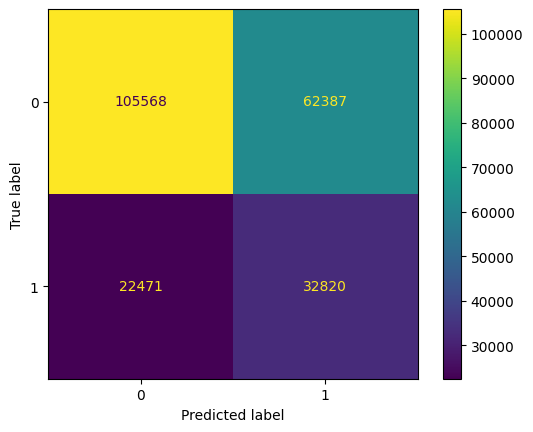

accuracy_score:  0.619890166005214
sensivilidad:  0.5935866596733645
especificidad:  0.6285493138042928
Precisión: 0.34472255191319967
F1-Score: 0.4361519754415341
roc_auc_score:  0.6651472085188


In [ ]:
#Grafica  matriz de confucion
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,f1_score

y_proba_xgb = modelo_xgb.predict_proba(x_test)[:, 1]

cm2 = confusion_matrix(y_test,y_pred_xgb)
diplay2 = ConfusionMatrixDisplay(cm2)
diplay2.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,y_pred_xgb))
print('sensivilidad: ',recall_score(y_test,y_pred_xgb,pos_label=1))
print('especificidad: ',recall_score(y_test,y_pred_xgb,pos_label=0))
print('Precisión:', precision_score(y_test, y_pred_xgb, pos_label=1)) # De todas las predicciones positivas que hizo el modelo, ¿cuántas fueron correctas?
print('F1-Score:', f1_score(y_test, y_pred_xgb, pos_label=1))
print('roc_auc_score: ',roc_auc_score(y_test,y_proba_xgb))

### **Optimizamos el universo de hiperparametros para el modelo 3**

In [ ]:
import xgboost as xgb
import optuna

pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Relación ≈ 3:1



def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "aucpr",
        "random_state": 123,
        "scale_pos_weight": pos_weight,  # Ya lo calculaste externamente
        # Rangos sugeridos para Optuna:
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),  # Regularización para splits
        "reg_alpha": trial.suggest_float("r
        t", 1, 10),
    }

    model = xgb.XGBClassifier(**params)



    # Validación cruzada estratificada (5 folds)
    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = cross_validate(model, x_train, y_train, cv=kf, scoring="roc_auc", n_jobs=-1)
    return np.mean(cv_results["test_score"])

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2025-04-21 21:59:59,853] A new study created in memory with name: no-name-cb48fc9a-56e0-4943-8448-eaca5ebad6fe
[I 2025-04-21 22:03:13,074] Trial 0 finished with value: 0.7981160809699236 and parameters: {'n_estimators': 700, 'learning_rate': 0.022374276320062832, 'max_depth': 8, 'subsample': 0.6988822189799271, 'colsample_bytree': 0.6471807373434451, 'gamma': 2.9602856961378734, 'reg_alpha': 6.5186310368959095, 'reg_lambda': 0.8197092449882359, 'min_child_weight': 6}. Best is trial 0 with value: 0.7981160809699236.
[I 2025-04-21 22:05:01,978] Trial 1 finished with value: 0.6398012638974597 and parameters: {'n_estimators': 700, 'learning_rate': 0.057539566289210045, 'max_depth': 4, 'subsample': 0.8909459486774169, 'colsample_bytree': 0.7528590996946054, 'gamma': 1.381291349398905, 'reg_alpha': 2.8787382996469124, 'reg_lambda': 3.5521014271623064, 'min_child_weight': 6}. Best is trial 0 with value: 0.7981160809699236.
[I 2025-04-21 22:08:28,590] Trial 2 finished with value: 0.87470499

KeyboardInterrupt: 